# 📊 온라인 쇼핑몰 차트 자동 저장 노트북
이 노트북은 `shop.db`에 저장된 데이터를 불러와 주요 분석 차트를 다시 그린 뒤, `images/` 폴더에 PNG 파일로 자동 저장합니다.

- 생성 파일 예시:
  - `images/monthly_revenue.png`
  - `images/category_revenue.png`
  - `images/age_gender_aov.png`
  - `images/order_count_dist.png`
  - `images/device_revenue.png`


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 이미지 저장 폴더 생성
os.makedirs('images', exist_ok=True)

# DB 연결
conn = sqlite3.connect('shop.db')
cursor = conn.cursor()
print('DB 연결 및 images 폴더 준비 완료')

DB 연결 및 images 폴더 준비 완료


## 1. 월별 매출 차트 저장

In [3]:
query_monthly = '''
SELECT
    strftime('%Y-%m', o.order_date) AS ym,
    SUM(oi.quantity * oi.unit_price) AS revenue,
    COUNT(DISTINCT o.order_id) AS num_orders
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
WHERE o.order_status = "paid"
GROUP BY ym
ORDER BY ym;
'''

df_month = pd.read_sql_query(query_monthly, conn)
df_month

,ym,revenue,num_orders
0,2024-11,38039867,62
1,2024-12,157910958,272
2,2025-01,193835885,318
3,2025-02,184503180,295
4,2025-03,203150051,348
5,2025-04,179008962,310
6,2025-05,200072779,330
7,2025-06,191828092,321
8,2025-07,183599271,313
9,2025-08,199153378,338


C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1078559574.py:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) De

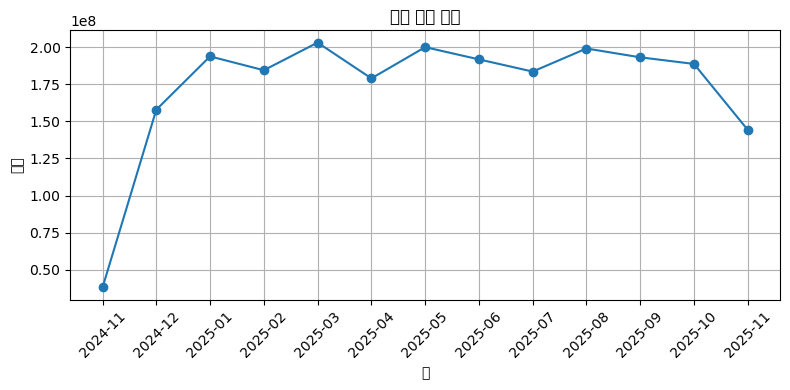

images/monthly_revenue.png 저장 완료


In [4]:
plt.figure(figsize=(8, 4))
plt.plot(df_month['ym'], df_month['revenue'], marker='o')
plt.xticks(rotation=45)
plt.title('월별 매출 추이')
plt.xlabel('월')
plt.ylabel('매출')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/monthly_revenue.png', dpi=150, bbox_inches='tight')
plt.show()
print('images/monthly_revenue.png 저장 완료')

## 2. 카테고리별 매출 차트 저장

In [5]:
query_category = '''
SELECT
    p.category,
    SUM(oi.quantity * oi.unit_price) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN orders o ON oi.order_id = o.order_id
WHERE o.order_status = "paid"
GROUP BY p.category
ORDER BY revenue DESC;
'''

df_cat = pd.read_sql_query(query_category, conn)
df_cat

,category,revenue
0,패션,467276895
1,뷰티,417377932
2,가전,405305421
3,생활용품,349579927
4,스포츠,323703968
5,식품,294140630


C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1014944347.py:6: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) D

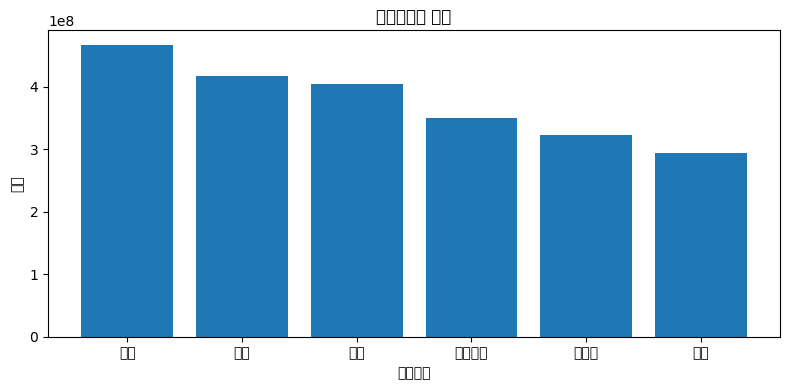

images/category_revenue.png 저장 완료


In [6]:
plt.figure(figsize=(8, 4))
plt.bar(df_cat['category'], df_cat['revenue'])
plt.title('카테고리별 매출')
plt.xlabel('카테고리')
plt.ylabel('매출')
plt.tight_layout()
plt.savefig('images/category_revenue.png', dpi=150, bbox_inches='tight')
plt.show()
print('images/category_revenue.png 저장 완료')

## 3. 연령·성별 AOV 차트 저장

In [7]:
query_gender_age = '''
WITH order_amounts AS (
    SELECT
        o.order_id,
        o.customer_id,
        SUM(oi.quantity * oi.unit_price) AS amount
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    WHERE o.order_status = "paid"
    GROUP BY o.order_id
)
SELECT
    c.gender,
    CASE
        WHEN c.age < 20 THEN '10대 이하'
        WHEN c.age BETWEEN 20 AND 29 THEN '20대'
        WHEN c.age BETWEEN 30 AND 39 THEN '30대'
        WHEN c.age BETWEEN 40 AND 49 THEN '40대'
        ELSE '50대 이상'
    END AS age_group,
    COUNT(*) AS num_orders,
    AVG(amount) AS avg_order
FROM order_amounts oa
JOIN customers c ON oa.customer_id = c.customer_id
GROUP BY c.gender, age_group
ORDER BY age_group, c.gender;
'''

df_ga = pd.read_sql_query(query_gender_age, conn)
df_ga

,gender,age_group,num_orders,avg_order
0,F,10대 이하,92,637719.358696
1,M,10대 이하,123,608565.626016
2,F,20대,320,604005.531250
3,M,20대,387,585586.291990
4,F,30대,425,591288.305882
5,M,30대,389,585322.064267
6,F,40대,392,539154.117347
7,M,40대,362,609574.621547
8,F,50대 이상,649,604473.716487
9,M,50대 이상,668,599777.953593


C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1584169498.py:7: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) 

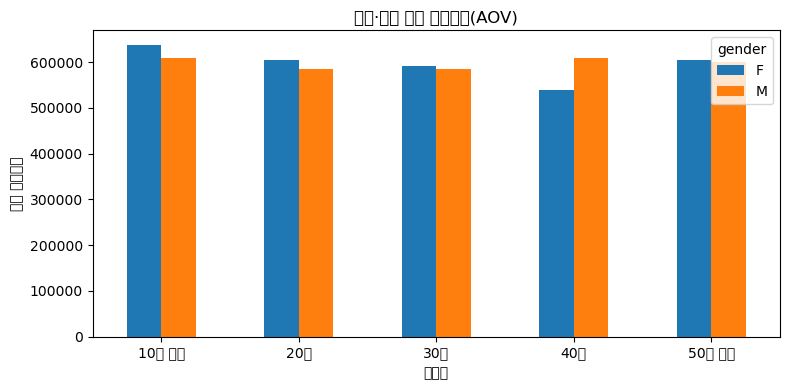

images/age_gender_aov.png 저장 완료


In [8]:
pivot_aov = df_ga.pivot(index='age_group', columns='gender', values='avg_order')
pivot_aov.plot(kind='bar', figsize=(8, 4))
plt.title('연령·성별 평균 주문금액(AOV)')
plt.xlabel('연령대')
plt.ylabel('평균 주문금액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('images/age_gender_aov.png', dpi=150, bbox_inches='tight')
plt.show()
print('images/age_gender_aov.png 저장 완료')

## 4. 재구매 분포 차트 저장

In [9]:
query_repurchase = '''
SELECT customer_id, COUNT(DISTINCT order_id) AS order_count
FROM orders
WHERE order_status = "paid"
GROUP BY customer_id;
'''

df_re = pd.read_sql_query(query_repurchase, conn)
df_re.head()

,customer_id,order_count


C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\527827773.py:9: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sa

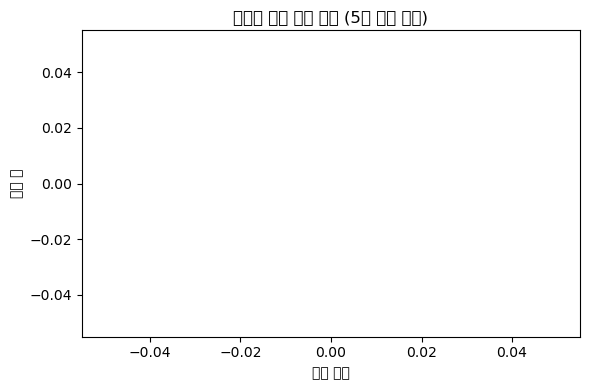

images/order_count_dist.png 저장 완료


In [10]:
df_re['order_count_clip'] = df_re['order_count'].clip(upper=5)
order_dist = df_re['order_count_clip'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(order_dist.index.astype(str), order_dist.values)
plt.title('고객별 주문 횟수 분포 (5회 이상 묶음)')
plt.xlabel('주문 횟수')
plt.ylabel('고객 수')
plt.tight_layout()
plt.savefig('images/order_count_dist.png', dpi=150, bbox_inches='tight')
plt.show()
print('images/order_count_dist.png 저장 완료')

## 5. 디바이스별 매출 차트 저장

In [11]:
query_device_pay = '''
SELECT
    o.device_type,
    SUM(oi.quantity * oi.unit_price) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
WHERE o.order_status = "paid"
GROUP BY o.device_type
ORDER BY revenue DESC;
'''

df_device = pd.read_sql_query(query_device_pay, conn)
df_device

,device_type,revenue


C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dlwns\AppData\Local\Temp\ipykernel_5644\1744100786.py:6: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu

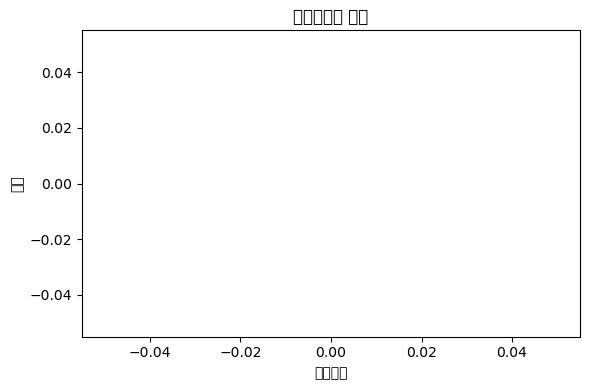

images/device_revenue.png 저장 완료


In [12]:
plt.figure(figsize=(6, 4))
plt.bar(df_device['device_type'], df_device['revenue'])
plt.title('디바이스별 매출')
plt.xlabel('디바이스')
plt.ylabel('매출')
plt.tight_layout()
plt.savefig('images/device_revenue.png', dpi=150, bbox_inches='tight')
plt.show()
print('images/device_revenue.png 저장 완료')

모든 차트 저장이 완료되면 `images/` 폴더 안에 PNG 파일들이 생성됩니다. 필요하다면 `conn.close()`를 추가하여 DB 연결을 종료할 수 있습니다.